## Final Project Submission
### Group 3.1
* Evah Wangari
* Dorine Langat
* Grace Nyongesa
* Maureen Anduuru
* Stella Kitur
* Vivian Adhiambo

## Business Overview
---


![Real_Estate](https://i.pinimg.com/564x/d1/0b/cb/d10bcb894bcc096e432dd6d660d1a616.jpg)




### Introduction

Real estate is one of the most important sectors of any economy. Understanding the key drivers of housing prices can provide valuable insights for both buyers and sellers in the market. In this project, we analyze a data set of house sales in a northwestern county to identify the factors that influence housing prices in the area.

## Business Understanding
The real estate agency helps homeowners buy and/or sell homes. One of the key services they provide is advice to homeowners about how home renovations can increase the estimated value of their homes. The agency is interested in developing a model that can predict the estimated value of a home after renovations, based on the type and cost of the renovations.

### Business Problem
The real estate agency needs to provide accurate advice to homeowners about how home renovations can increase the estimated value of their homes, and by what amount. However, the agency currently lacks a reliable method for predicting the impact of specific home renovations on home value. As a result, the agency is unable to provide accurate advice to homeowners about the potential return on investment for different renovation projects.

The project objectives we aim to solve include:

1. To identify features influencing the pricing.

2. To analyse trends in house prices over time (time series analysis) and predict future prices.

3. To identify undervalued properties (outlier detection) and recommend better pricing strategies.

---
## Data Understanding

The relevant dataset used in this project is the [kc_house_data](https://github.com/dorinelangat/dsc-phase-2-project-v2-3/tree/main/data), found in the data folder of this repository.

The dataset contains information on sale prices for houses, property sizes, location, and the years of construction and renovation alongside other relavant information.


In [1]:
# Loading the libraries

# data
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import folium
import warnings

# modeling
import statsmodels.api as sm 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# statistics
import scipy.stats as stats
from sklearn.metrics import mean_absolute_error

# styling
plt.style.use('seaborn')
sns.set_style('whitegrid')

warnings.filterwarnings('ignore')

In [2]:
house_df = pd.read_csv("kc_house_data.csv")
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
data = house_df.copy()

This function returns a comprehensive description for our data.

In [4]:
def explore_data(df):
    '''
    Print some basic statistics and information about the DataFrame
    '''
    print("Number of rows:", df.shape[0])
    print("Number of columns:", df.shape[1])
    print("Data types:\n", df.dtypes)
    print("info:\n", df.info())
    print("columns:", df.columns)
    print("Head:\n", df.head())
    print("Tail:\n", df.tail())
    print("statistical summary:\n", df.describe())
    print("Missing values:\n", df.isnull().sum())
    print("duplicated values:\n", df.duplicated)
    #the correlation of other features with the price
    print("correlation with the price:\n", df.corr()['price'])
    print("condition column:\n", df['condition'].value_counts())
    print("grade column:\n", df['grade'].value_counts())
    print("view column:\n", df['view'].value_counts())

In [5]:
explore_data(data)

Number of rows: 21597
Number of columns: 21
Data types:
 id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-n

### Column Names and Descriptions for the DataSet
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
* `view` - Quality of view from house
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
* `grade` - Overall grade of the house. Related to the construction and design of the house.
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

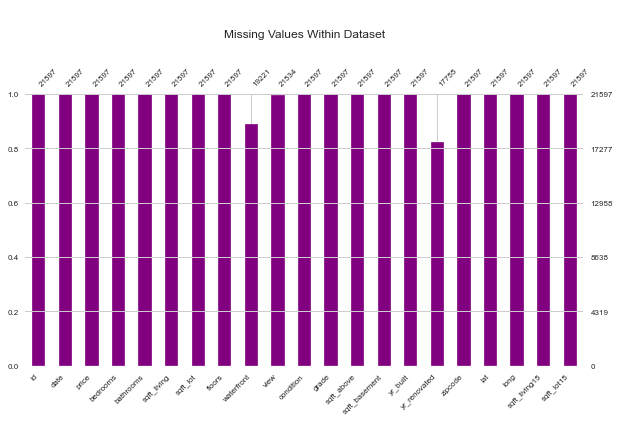

In [6]:
# Visualise the missing values in the dataset
msno.bar(data, color='purple', figsize=(10, 5), fontsize=8)
plt.title("""

Missing Values Within Dataset

""");

In [7]:
# percentage of missing data
house_df.isnull().sum()/len(house_df)*100

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

## Data Cleaning and Preparation

In [8]:
def clean_data(df):
    '''
    Clean data by removing missing values and duplicates
    '''
    

    # Remove duplicates
    df.drop_duplicates(inplace=True)

    # Replace "?" and " " values with NaN
    df['sqft_basement'] = df['sqft_basement'].replace('?', np.nan).replace('', np.nan)

    # Convert the column to float data type
    df['sqft_basement'] = df['sqft_basement'].astype(float)

    # Convert the 'date' column to a datetime data type
    df['date'] = pd.to_datetime(df['date'])

    #Converting the 'waterfront' column to a binary variable where 1 represents 'YES' and 0 represents 'NO'
    df['waterfront'] = df['waterfront'].apply(lambda x: 1 if x == 'YES' else 0)

    # Remove missing values
    df.dropna(inplace=True)
    

    return df

In [9]:
clean_data(data)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0,NONE,...,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [10]:
#confirming if our data is clean
explore_data(data)

Number of rows: 17340
Number of columns: 21
Data types:
 id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                     object
condition                object
grade                    object
sqft_above                int64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17340 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             17340 non-null  int64     

The percentage value for the missing values dropped from our dataframe is 9.72%

## Data Analysis

## Objective 1. **Identifying features influencing the pricing.**

column distribution functions (numerical variables)

In [11]:
# Function to plot the histogram, kde and boxplot of the data
def plot_distribution(df, col, title, bins_=10):
    ''' Plots the distribution of a column in a dataframe as a histogram, kde and boxplot '''
    # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(10, 5))
    
    # assign a graph to each ax
    sns.boxplot(df[col], ax=ax_box, color='lightgreen')
    sns.histplot(data=df, x=col, ax=ax_hist, kde=True, color='lightgreen', bins=bins_, edgecolor='black')
    plt.suptitle(title)
    plt.tight_layout();

##### 1.price distribution

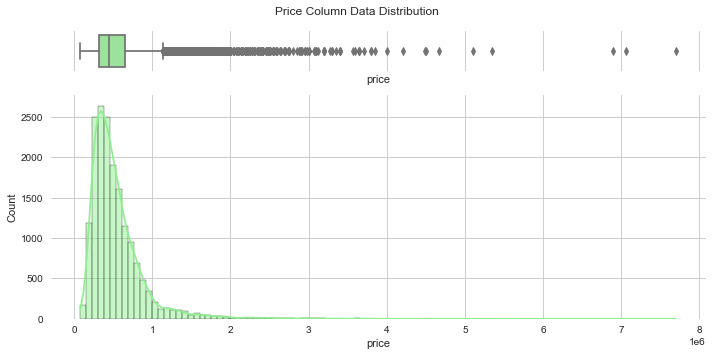

In [12]:
# Visualise the data distribution
plot_distribution(data, 'price', 'Price Column Data Distribution', 100)

##### 2.Plotting a correlation matrix of numerical features using Seaborn heatmap

A correlation matrix can be used to identify variables that are strongly correlated with each other, and may therefore be important predictors of a target variable. This can help in feature selection for predictive modeling tasks.

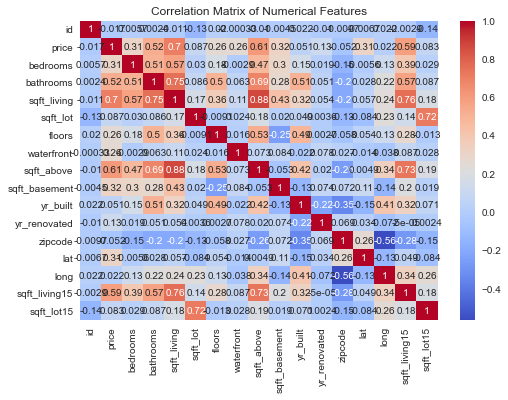

In [13]:
# Plot correlation matrix of numerical features
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

##### 3. Plot boxplots of each categorical feature vs price using Seaborn boxplot

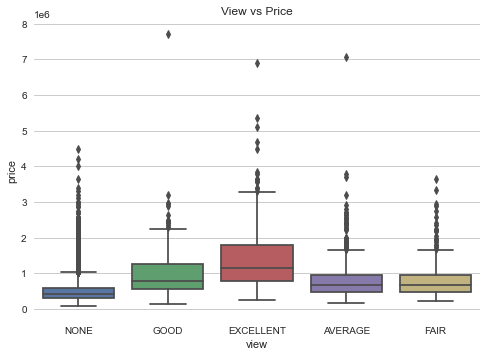

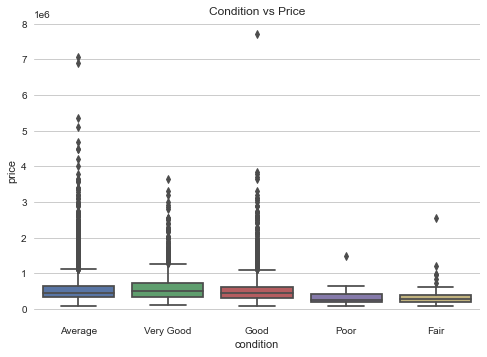

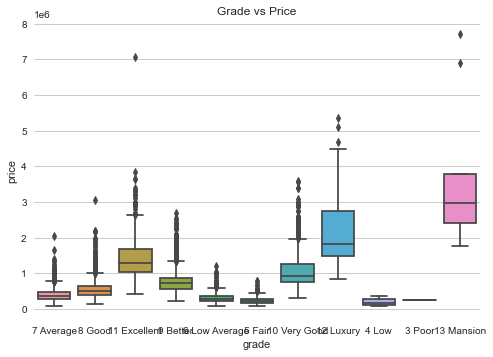

In [14]:
# Plot boxplots of categorical features vs price
cat_features = [ 'view', 'condition', 'grade']
for feature in cat_features:
    sns.boxplot(x=feature, y='price', data=data)
    plt.title(f'{feature.capitalize()} vs Price')
    plt.show()

##### 4. Features that has the highest correlation with the price and visualizing them

In [15]:
# Identify top 5 features that have the highest correlation with price
corr_matrix = data.corr()
top_5_features = corr_matrix['price'].abs().sort_values(ascending=False)[1:6]
print("Top 5 features that have the highest correlation with price:\n", top_5_features)



Top 5 features that have the highest correlation with price:
 sqft_living      0.703520
sqft_above       0.608209
sqft_living15    0.586046
bathrooms        0.524719
sqft_basement    0.321079
Name: price, dtype: float64


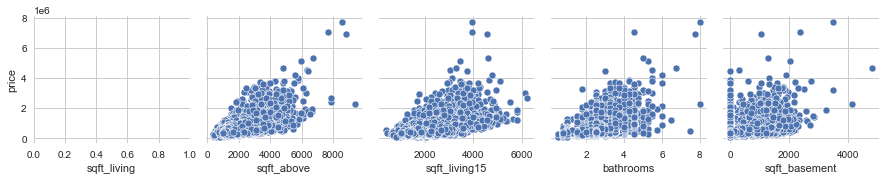

In [16]:
# Visualize the relationship between the top 5 features and price
sns.pairplot(data, x_vars=top_5_features.index, y_vars=['price'])

In [17]:
def plot_scatter(x, y, x_label, y_label, title):
    """
    Plots a scatter plot of x and y values with labeled axes and title.

    Args:
        x (list): A list of x values.
        y (list): A list of y values.
        x_label (str): The label for the x axis.
        y_label (str): The label for the y axis.
        title (str): The title for the plot.
    """
    plt.scatter(x, y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()


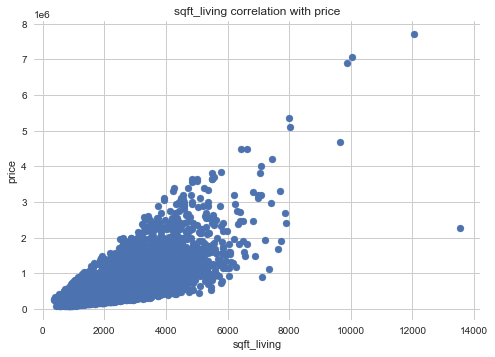

In [18]:
plot_scatter(data['sqft_living'], data['price'],'sqft_living', 'price','sqft_living correlation with price')

The above scatter plots shows a high correlation with the price.

##### Modelling

In [19]:
y = data['price']
X_baseline = data[['sqft_living']]
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                 1.699e+04
Date:                Thu, 20 Apr 2023   Prob (F-statistic):               0.00
Time:                        04:03:57   Log-Likelihood:            -2.4093e+05
No. Observations:               17340   AIC:                         4.819e+05
Df Residuals:                   17338   BIC:                         4.819e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.825e+04   4936.020     -9.776      

* The model is statistically significant overall, with an F-statistic p-value well below 0.05
* The model explains about 49.9% of the variance in price
* The model coefficients (const and sqft_living) are both statistically significant, with t-statistic p-values well below 0.05
* The coefficient for sqft_living is 286.5963, which means that for every additional square foot of living space, the price of the property increases by $286.60.
* The intercept (const) of the model is -56200, which means that when the size of the living space is zero, the estimated price is -$56,200. However, this value does not have a practical interpretation since it is not possible for a house to have zero square feet of living space.
* The Jarque-Bera test for normality shows that the errors are not normally distributed since the p-value is less than 0.05. This suggests that there may be some non-linearity or heteroscedasticity in the relationship between the independent variable and dependent variable.

Overall, we can conclude that sqft_living is a significant predictor of price, but there may be other factors that also affect the price of a property. Additionally, the model may not be the best fit for the data due to the issues with normality and multicollinearity.

*   Multiple linear regression

In [20]:
#Convert the 'condition' and 'grade' columns to ordinal variables
conditions = {'Poor': 1, 'Average': 2, 'Fair': 3, 'Good': 4, 'Very Good': 5, 'Excellent': 6}
data['condition'] = data['condition'].map(conditions)

grades = {'3 Poor': 1,'4 Low': 2,'5 Fair' : 3, '6 Low Average': 4, '7 Average': 5, '8 Good': 6, '9 Better': 7, '10 Very Good' : 8, '11 Excellent': 8, '12 Luxury': 9, '13 Mansion': 10}
data['grade'] = data['grade'].map(grades)

In [21]:
# set the predictor variables
X = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', "grade","condition","yr_renovated","yr_built"]]

# add a constant to the predictor variables
X = sm.add_constant(X)

# set the response variable
y = data['price']

# create the model
model = sm.OLS(y, X)
model_results = model.fit()

# print the model summary
print(model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     3002.
Date:                Thu, 20 Apr 2023   Prob (F-statistic):               0.00
Time:                        04:03:58   Log-Likelihood:            -2.3814e+05
No. Observations:               17340   AIC:                         4.763e+05
Df Residuals:                   17329   BIC:                         4.764e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6.914e+06   1.57e+05     44.032   

According to the output, our multiple linear regression model has an R-squared value of 0.638, indicating that approximately 63.4% of the variance in home prices can be explained by the predictor variables included in the model.

The coefficients of the predictor variables indicate the impact of each variable on the home price.
 1. Waterfront property: Homes located on the waterfront have an average increase of $761,500 in value compared to homes that are not on the waterfront.
 2. Square footage of living area: An increase in one square foot of living area leads to an increase of $196.33 in home price.
 3. Grade: Higher-grade properties have an average increase of $120,400 in value compared to lower-grade properties.
 4. Number of bathrooms: Each additional bathroom adds an average of $51,180 to the home price
 5. Bedrooms: Each additional bedroom adds an average of $48,080 to the home price

The p-values of the coefficients indicate the statistical significance of the impact of each variable on the home price. All the predictor variables in our model have a p-value of 0.000, indicating that they are statistically significant in predicting the home price.

###  Metric for Evaluation

In [22]:
# Calculate the mean absolute error of the baseline model
baseline_mae = mean_absolute_error(y, baseline_results.predict(sm.add_constant(X_baseline)))
baseline_mae

173788.4850613264

In [23]:
#calculating the RMSE   for the baseline model
rmse = np.sqrt(baseline_mae)
rmse

416.87946106917576

The model is off by about 174670

In [24]:
# calculating the MAE
multiple_linear_mae = mean_absolute_error(y, model_results.predict(sm.add_constant(X)))
multiple_linear_mae

144189.40880555194

In [25]:
#Calculating the RMSE
rmse = np.sqrt(multiple_linear_mae)
rmse

379.7228052218512

## Objective 2 : **To analyse trends in house prices over time (time series analysis) and predict future prices.**

In [26]:
data_2 = house_df.copy()

In [27]:
#seperating date into month and year 
data_2['date'] = pd.to_datetime(data_2['date'])

# extracting month and year 
data_2['month_sold'] = data_2['date'].dt.month
data_2['year_sold'] = data_2['date'].dt.year

data_2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,2014
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,2014
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,2,2015
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12,2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,2015


In [28]:
# Retrieve the mean
data_monthly = data_2['month_sold'].mean()
data_monthly

6.573968606750937

Based on the output given, the average month the houses were sold was in June

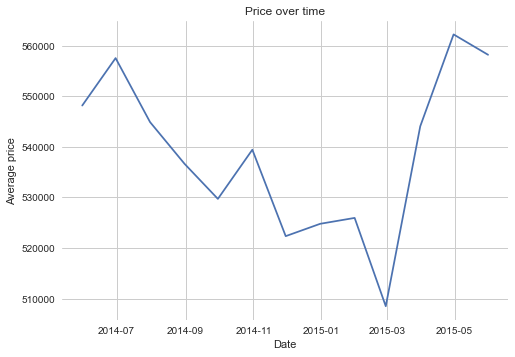

In [29]:
# assuming 'date' column is already converted to datetime format

# group data by date and calculate mean price
monthly_avg_price = data_2.groupby(pd.Grouper(key='date', freq='M'))['price'].mean()

# plot time series
plt.plot(monthly_avg_price.index, monthly_avg_price.values)
plt.xlabel('Date')
plt.ylabel('Average price')
plt.title('Price over time')
plt.show()

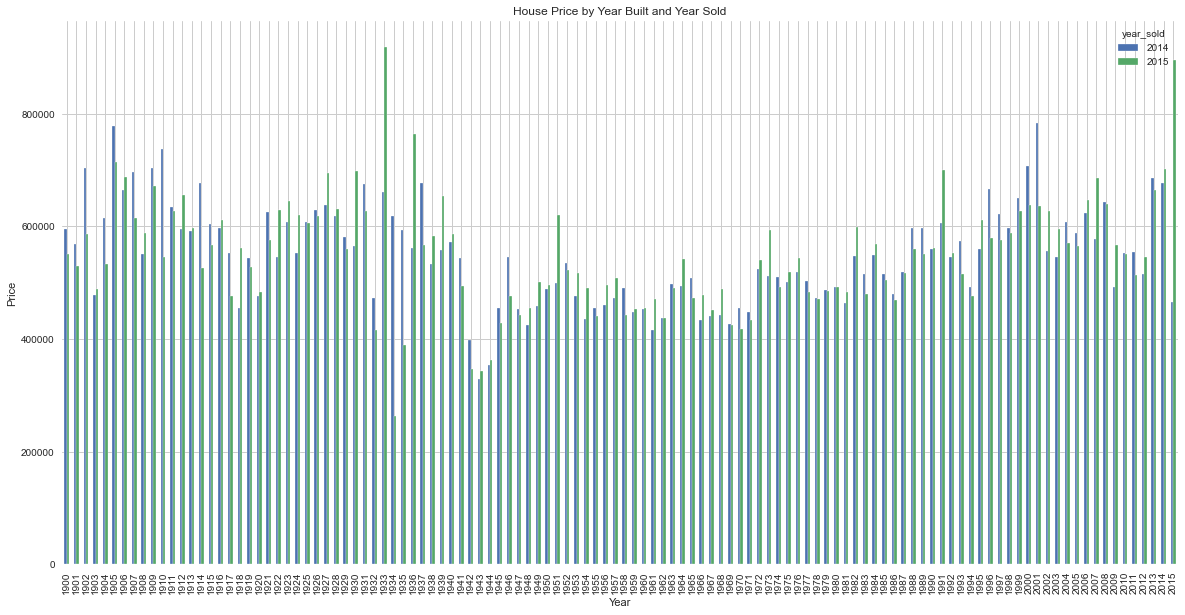

In [30]:
# pivot table with the sale price for the houses for each year built and year sold combination
yearly_price = data_2.pivot_table(index='yr_built', columns='year_sold', values='price')

# plot bar chart with two bars for each year, one for year built and one for year sold
fig, ax = plt.subplots(figsize=(20,10))
yearly_price.plot(kind='bar', ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Price')
ax.set_title('House Price by Year Built and Year Sold')
plt.xticks(rotation=90)

plt.show()


In [31]:
# Convert 'yr_renovated' to datetime format and extract year
data_2['yr_renovated'] = pd.to_datetime(data_2['yr_renovated'], format='%Y', errors='coerce').dt.year

In [32]:
data_2['yr_renovated'] = data_2['yr_renovated'].astype('Int64').fillna(0)
data_2['yr_renovated']

0           0
1        1991
2           0
3           0
4           0
         ... 
21592       0
21593       0
21594       0
21595       0
21596       0
Name: yr_renovated, Length: 21597, dtype: Int64

In [33]:
# One hot encoding for the column 'yr_renovated'

data_2['renovated'] = (data_2['yr_renovated'] > 0).astype(int)

data_2['renovated'].value_counts()

0    20853
1      744
Name: renovated, dtype: int64

We notice that there are 651 houses that have been renovated and 15,111 houses that have not been renovated.

In [34]:
#creating a new column - age of the house- which will be given by the latest year minus year built
#latest year
yr_built_max = data_2['yr_built'].max()
print(yr_built_max)
#age column 
data_2['Age'] = yr_built_max - data_2['yr_built']
data_2.columns

2015


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'month_sold', 'year_sold',
       'renovated', 'Age'],
      dtype='object')

<AxesSubplot:xlabel='Age', ylabel='Density'>

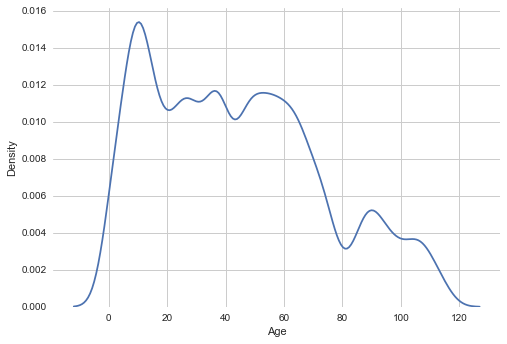

In [35]:
# Explore the Age column created

sns.kdeplot(data_2['Age'])


In [36]:
data_2[['price','bedrooms','sqft_living','condition','grade', 'yr_built','yr_renovated','month_sold','year_sold', 'sqft_lot','Age']].corr()

,price,bedrooms,sqft_living,yr_built,yr_renovated,month_sold,year_sold,sqft_lot,Age
price,1.000000,0.308787,0.701917,0.053953,0.117855,-0.009928,0.003727,0.089876,-0.053953
bedrooms,0.308787,1.000000,0.578212,0.155670,0.017900,-0.001046,-0.009949,0.032471,-0.155670
sqft_living,0.701917,0.578212,1.000000,0.318152,0.051060,0.012112,-0.029014,0.173453,-0.318152
yr_built,0.053953,0.155670,0.318152,1.000000,-0.202555,-0.006235,0.003574,0.052946,-1.000000
yr_renovated,0.117855,0.017900,0.051060,-0.202555,1.000000,0.007649,-0.019713,0.004979,0.202555
month_sold,-0.009928,-0.001046,0.012112,-0.006235,0.007649,1.000000,-0.782325,-0.002591,0.006235
year_sold,0.003727,-0.009949,-0.029014,0.003574,-0.019713,-0.782325,1.000000,0.005628,-0.003574
sqft_lot,0.089876,0.032471,0.173453,0.052946,0.004979,-0.002591,0.005628,1.000000,-0.052946
Age,-0.053953,-0.155670,-0.318152,-1.000000,0.202555,0.006235,-0.003574,-0.052946,1.000000


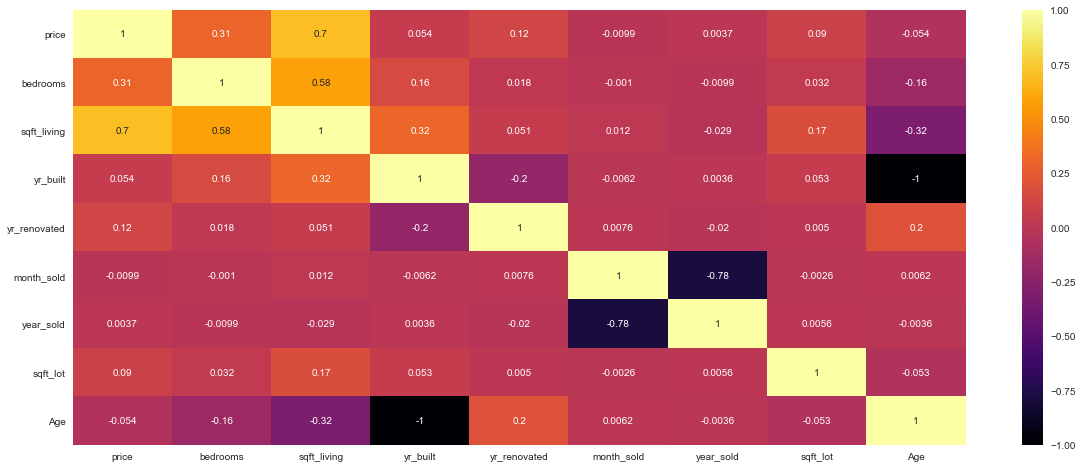

In [37]:
#looking at a correlation heatmap between different variables, including the age column
plt.figure(figsize=(20, 8))
corr_matrix1 =data_2[['price','bedrooms','sqft_living','condition','grade', 'yr_built','yr_renovated','month_sold','year_sold', 'sqft_lot','Age']].corr()
sns.heatmap(corr_matrix1, cmap='inferno',annot=True)
plt.show()

The following correlation matrix shows some of the features as well as including the newly created column, age.

Text(0.5, 1.0, 'price vs Age')

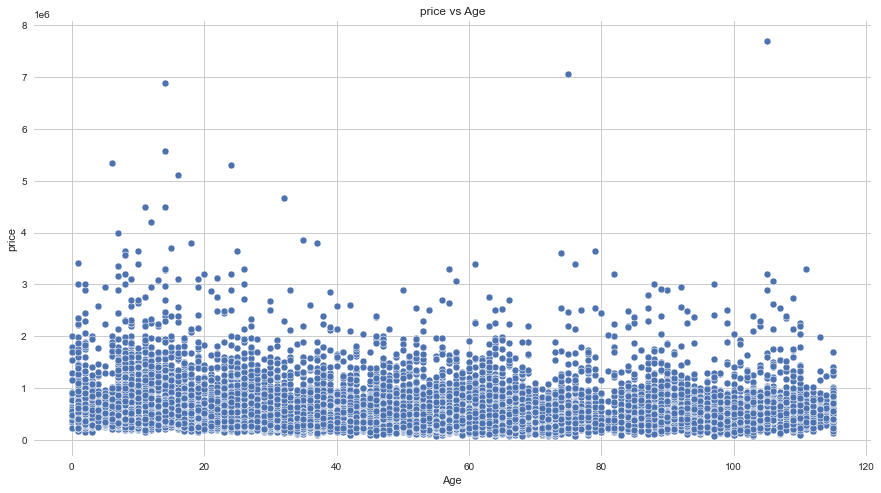

In [38]:
# Visualization on Age v Price on a scatter plot

plt.figure(figsize=(15, 8))
sns.scatterplot(data=data_2, x='Age',  y='price')
plt.title('price vs Age')


In [39]:
X = data_2[['Age']]
y = data_2['price']

# Add constant to X
X = sm.add_constant(X)

# Create and fit OLS model
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     63.05
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           2.12e-15
Time:                        04:04:16   Log-Likelihood:            -3.0736e+05
No. Observations:               21597   AIC:                         6.147e+05
Df Residuals:                   21595   BIC:                         6.147e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         5.7e+05   4495.766    126.783      0.000    5.61e+05    5.79e+05
Age         -674.7431     84.979     -7.940      0.000    -841.308    -508.178
==============================================================================
Omnibus:                    19135.901   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1142512.023
Skew:                           4.031   Prob(JB):                         0.00
Kurtosis:                      37.708   Cond. No.                         95.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b>Interpretation</b>

Based on this simple regression model, we can note that there is a statistically negative significant relationship between the age of the property and the price at which it was sold.

* The coefficient of -626.0922 indicates that, a one year increase would be associated with a $626.09 decrease in the sale price, on average.

* The R-Squared and Adjusted R-Squared of 0.002, would suggest that only a small proportion of the variation in price can be explained by the age of the property.

* F-statistic of 38.47 & the associated p-value of 5.70e-10, indicates overall the model is statistically significant. In addition, the p-value for the coefficient of age is 0.000, which would also confirm that the variable is also statistically significant. 

* Overall, the results suggest that the age of a property may be a significant predictor of its price, however there are other variables that would need further exploration in order to understand better the determinants of house prices.

In [40]:
# Predicts the values using the model
y_pred = model.predict(X)

# Calculate the mean absolute error
mae = np.mean(np.abs(y - y_pred))
mae


mse = np.mean((y - y_pred)** 2)

rmse = np.sqrt(mse)
rmse

366824.560246138

#### Multiple Linear Regression

We created a multiple linear regression model that includes price as the dependent variable and different features such as :
* bedrooms
* sqft_living
* condition 
* year_sold and month_sold &
* age

as the independent variables in this model.

In [41]:
from statsmodels.formula.api import ols

features = ['bedrooms','sqft_living','condition', 'yr_built', 'Age', 'year_sold', 'month_sold','price' ]

formula = 'price ~ sqft_living + bedrooms + Age + condition'
model = ols(formula = formula, data = data_2[features]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     3645.
Date:                Thu, 20 Apr 2023   Prob (F-statistic):               0.00
Time:                        04:04:16   Log-Likelihood:            -2.9897e+05
No. Observations:               21597   AIC:                         5.979e+05
Df Residuals:                   21589   BIC:                         5.980e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -6.426e+04   7469.137     -8.604      0.000   -7.89e+04   -4.96e+04
condition[T.Fair]       -6.98e+04   1.93e+04     -3.615      0.000   -1.08e+05    -3.2e+04
condition[T.Good]      -4200.7601   4138.421     -1.015      0.310   -1.23e+04    3910.851
condition[T.Poor]      -6.039e+04   4.64e+04     -1.303      0.193   -1.51e+05    3.05e+04
condition[T.Very Good]  4.104e+04   6738.584      6.090      0.000    2.78e+04    5.42e+04
sqft_living              340.3250      2.359    144.294      0.000     335.702     344.948
bedrooms               -6.174e+04   2246.271    -27.484      0.000   -6.61e+04   -5.73e+04
Age                     2348.3762     66.234     35.456      0.000    2218.552    2478.201
==============================================================================
Omnibus:                    13970.999   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           474274.361
Skew:                           2.608   Prob(JB):                         0.00
Kurtosis:                      25.357   Cond. No.                     6.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<b> Interpretation </b>

This multiple linear regression model purpose was to predict house prices based on several independent variables.

* The <b>R-Squared value</b> 0.549 suggests that the model can explain for 54.9% of the variance in house prices, this may be interpreted as a moderate fit.

* Under the <b>intercept</b> coefficient of -7.668e+04 means that, on average, the coefficients of the different conditions show that, a house that is in very good condition can be sold for $40,210 more than the average price, in comparison to a house that is in fair condition that sells for $70,200 less!

* The coefficient for <b>sqft_living</b> of 346.6924 goes to imply that, on average, the price of a house increases by $346.69 for each additional square foot of living space. The coefficient for bedrooms of -6.277e+04 implies that, on average, each additional bedroom decreases the house price by $62,770.

* The coefficient for <b> age </b>suggests that, on average, the price of a house increases by $2,428.66 for each additional year of age. 

*  The model has a significant F-statistic of 2744 and a low p-value, indicating that the model is statistically significant.

## Objective 3 : **To identify extreme prices (outlier detection) and recommend better pricing strategy.**

In this section, we analyse the outliers in price category. We identify the houses with extremely high and low prices, and try to find out the reason for it. We also suggest a better pricing strategy.

In [42]:
data_3 = house_df.copy()

In order to identify a promising categorical predictor, we need to create bar graphs for each of these categorical features.

Identifying outliers in our dataset. 

In [43]:
clean_data(data_3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0,NONE,...,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [44]:
count = 0
price_outliers = []

# Calculate the z-score for each data point
z_scores = (data_3['price'] - data_3['price'].mean()) / data_3['price'].std()

# Create a new empty DataFrame to store the outliers
data_outliers = pd.DataFrame(columns=data_3.columns)

for idx, row in data_3['price'].T.iteritems():
    if abs(z_scores[idx]) > 3:
        count += 1
        # Append the outlier row to the data_outliers DataFrame
        data_outliers = data_outliers.append(data_3.loc[idx])
        # Add the index of the outlier row to the price_outliers list (if needed)
        price_outliers.append(idx)

# Print the count of outliers found
print(f"{count} outliers found")



325 outliers found


The code above checks if there is any extreme prices for the houses. It then adds them to the new list of extreme prices and shows how many it found.

In [45]:
data_outliers.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21,2524049179,2014-08-26,2000000.0,3,2.75,3050,44867,1.0,0,EXCELLENT,...,9 Better,2330,720.0,1968,0.0,98040,47.5316,-122.233,4110,20336
153,7855801670,2015-04-01,2250000.0,4,3.25,5180,19850,2.0,0,GOOD,...,12 Luxury,3540,1640.0,2006,0.0,98006,47.5620,-122.162,3160,9750
246,2025069065,2014-09-29,2400000.0,4,2.50,3650,8354,1.0,1,EXCELLENT,...,9 Better,1830,1820.0,2000,0.0,98074,47.6338,-122.072,3120,18841
282,7424700045,2015-05-13,2050000.0,5,3.00,3830,8480,2.0,0,FAIR,...,9 Better,2630,1200.0,1905,1994.0,98122,47.6166,-122.287,3050,7556
300,3225069065,2014-06-24,3080000.0,4,5.00,4550,18641,1.0,1,EXCELLENT,...,10 Very Good,2600,1950.0,2002,0.0,98074,47.6053,-122.077,4550,19508


In [46]:
data_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325 entries, 21 to 21560
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             325 non-null    object        
 1   date           325 non-null    datetime64[ns]
 2   price          325 non-null    float64       
 3   bedrooms       325 non-null    object        
 4   bathrooms      325 non-null    float64       
 5   sqft_living    325 non-null    object        
 6   sqft_lot       325 non-null    object        
 7   floors         325 non-null    float64       
 8   waterfront     325 non-null    object        
 9   view           325 non-null    object        
 10  condition      325 non-null    object        
 11  grade          325 non-null    object        
 12  sqft_above     325 non-null    object        
 13  sqft_basement  325 non-null    float64       
 14  yr_built       325 non-null    object        
 15  yr_renovated   325 n

In [47]:
# Convert the column to float data type
cols_to_convert = ['bedrooms','sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']

data_outliers[cols_to_convert] = data_outliers[cols_to_convert].astype(float)


In [48]:
data_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325 entries, 21 to 21560
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             325 non-null    object        
 1   date           325 non-null    datetime64[ns]
 2   price          325 non-null    float64       
 3   bedrooms       325 non-null    float64       
 4   bathrooms      325 non-null    float64       
 5   sqft_living    325 non-null    float64       
 6   sqft_lot       325 non-null    float64       
 7   floors         325 non-null    float64       
 8   waterfront     325 non-null    object        
 9   view           325 non-null    object        
 10  condition      325 non-null    object        
 11  grade          325 non-null    object        
 12  sqft_above     325 non-null    float64       
 13  sqft_basement  325 non-null    float64       
 14  yr_built       325 non-null    object        
 15  yr_renovated   325 n

Creating our baseline model

In [49]:
y = data_outliers['price']
X_baseline = data_outliers[['sqft_living']]
baseline_model_outliers = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results_outliers = baseline_model_outliers.fit()
print(baseline_results_outliers.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     184.1
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           1.70e-33
Time:                        04:04:25   Log-Likelihood:                -4799.4
No. Observations:                 325   AIC:                             9603.
Df Residuals:                     323   BIC:                             9610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.178e+05   1.21e+05      5.946      

In [50]:
baseline_model_outliers_mae = mean_absolute_error(y, baseline_results_outliers.predict(sm.add_constant(X_baseline)))
baseline_model_outliers_mae

450035.3925535948

In [51]:
rmse = np.sqrt(baseline_model_outliers_mae)
rmse

670.8467727831705

Creating a multiple linear regression model using additional variables

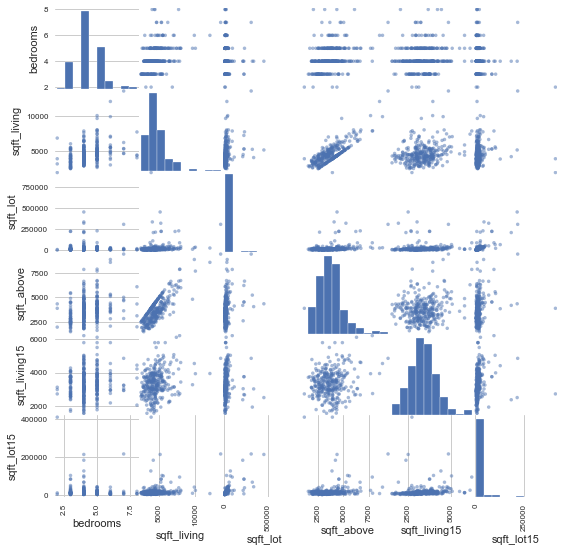

In [52]:
pd.plotting.scatter_matrix(data_outliers[cols_to_convert],figsize  = [9, 9]);
plt.show()

The above visualization, shows scatterplots for relationships between two predictors, and histograms for a single feature on the diagonal

In [53]:
# set the predictor variables
X = data_outliers[['bedrooms','sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']]

# add a constant to the predictor variables
X = sm.add_constant(X)

# set the response variable
y = data_outliers['price']

# create the model
model_outliers = sm.OLS(y, X)
model_outliers_results = model_outliers.fit()
# print the model summary
print(model_outliers_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     34.26
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           7.53e-32
Time:                        04:04:31   Log-Likelihood:                -4791.7
No. Observations:                 325   AIC:                             9597.
Df Residuals:                     318   BIC:                             9624.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8.412e+05   2.08e+05      4.043

In [54]:
model_outliers_mae = mean_absolute_error(y, model_outliers_results.predict(sm.add_constant(X)))
model_outliers_mae

439487.80576288764

In [55]:
rmse = np.sqrt(model_outliers_mae)
rmse

662.9387647157826

In [56]:
# function that predicts the house prices
def predict_house_price(bedrooms,sqft_living, sqft_lot, sqft_above, sqft_living15, sqft_lot15):
    # set the coefficients and intercept values
    b0 = 8.412e+05
    b1 = -8.721e+04
    b2 = 371.8604
    b3 = -1.3714
    b4 = 0.9192
    b5 = 48.3490
    b6 = -0.8813 
    # calculate the predicted house price
    house_price = b0 + (b1 * bedrooms) + (b2 * sqft_living) + (b3 * sqft_lot) + (b4 * sqft_above) + (b5 * sqft_living15) + (b6 * sqft_lot15)    
    return house_price

let's use the `predict_house_function` to predict house price for a house with 4bedrooms, 1000sqft_living, 1100sqft_lot, 1200sqft_above, 1300sqft_living15, and 1400sqft_lot15

In [57]:
predict_house_price(4,1000, 1100, 1200, 1300, 1400)

925434.78

In [58]:
#function that takes in the column name and data, and returns different plots for our regression model

def plot_regression(column_name, data):
    X = data[column_name]
    y = data['price']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    fig = plt.figure(figsize=(15,8))
    sm.graphics.plot_regress_exog(model_outliers, column_name, fig=fig)
    plt.show()


In [61]:
data_outliers[cols_to_convert].corr()

,bedrooms,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15
bedrooms,1.000000,0.387054,-0.107488,0.310058,0.112113,-0.097571
sqft_living,0.387054,1.000000,0.166530,0.815015,0.283288,0.184541
sqft_lot,-0.107488,0.166530,1.000000,0.210880,-0.023520,0.859677
sqft_above,0.310058,0.815015,0.210880,1.000000,0.188626,0.238080
sqft_living15,0.112113,0.283288,-0.023520,0.188626,1.000000,0.129114
sqft_lot15,-0.097571,0.184541,0.859677,0.238080,0.129114,1.000000


In [62]:
abs(data_outliers[cols_to_convert].corr()) > 0.75

,bedrooms,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15
bedrooms,True,False,False,False,False,False
sqft_living,False,True,False,True,False,False
sqft_lot,False,False,True,False,False,True
sqft_above,False,True,False,True,False,False
sqft_living15,False,False,False,False,True,False
sqft_lot15,False,False,True,False,False,True


In [63]:
#checking and dropping highly correlated features
corr_price_df = pd.DataFrame(data_outliers.corr()['price'])
corr_price_df.columns = ['Correlations']
corr_price_df = corr_price_df[(corr_price_df['Correlations'].abs() >= 0.3) & (corr_price_df.index != 'price')]

multi_df = pd.DataFrame()
for col in data_outliers.corr().columns:
    if any((data_outliers.corr()[col].abs() >= 0.75) & (data_outliers.corr()[col].index != col)):
        multi_df = multi_df.append(data_outliers.corr()[col].abs()[data_outliers.corr()[col].abs() >= 0.8].reset_index().rename(columns={'index': 'Features', col: 'Correlations'}), ignore_index=True)
print('Correlations with Price')
display(corr_price_df)

Correlations with Price


,Correlations
bathrooms,0.458543
sqft_living,0.602516
sqft_above,0.477815
sqft_basement,0.311576


To reduce multicollinearity in our model, we drop the highly correlated variables because they make it difficult to interpret the effects of individual predictors on the outcome variable.

We create a function that gives suggestions based on budget price. 

In [64]:
def suggest_houses(price_range):

    # Filter by price range
    data_filtered = data[(data['price'] >= price_range[0]) & (data['price'] <= price_range[1])]

    # Sort by price ascending
    data_sorted = data_filtered.sort_values(by='price')

    # Select top 5 suggestions
    data_suggestions = data_sorted.head(5)

    # Return the specifications of the suggested houses
    return data_suggestions[['bedrooms', 'sqft_living', 'floors', 'zipcode']]


In [65]:
suggest_houses((78000, 100000))

,bedrooms,sqft_living,floors,zipcode
465,1,430,1.0,98014
16184,2,730,1.0,98168
8267,3,860,1.0,98146
2139,2,520,1.0,98168
18453,2,900,1.0,98168


In [66]:
# calculating the age of the houses in the price outliers
data_outliers['house_age'] = np.where(data_outliers['yr_built']==0, 0, 2015 - data_outliers['yr_built'])
data_outliers['house_age'].value_counts()

9      15
1      14
14     10
2      10
11     10
       ..
40      1
86      1
36      1
81      1
115     1
Name: house_age, Length: 98, dtype: int64

In [67]:
# the number of houses older than 50 years in our outliers
house_age_gt_50 = list(data_outliers[data_outliers['house_age']>50]['house_age'])
len(house_age_gt_50)

117

### Metric of Success
We decided to opt for RMSE as our metric of success because it is measured in the same units as the response variable.

### Conclusion
1. Some of the features that influence the pricing of houses include:
    * Square footage of living space in the home: an additional square footage increases the price by $199.09
    * Waterfront: the presence of a waterfront has an associated increase in price of $70,000 
    * Condition of the house: houses in good conditions have an associated increase in price of $35,650 compared to houses with average condition.
    
2.  
    * For every additional year in the age of a house, there is an associated decrease in price of $626.09

3.  
    * Some of the overvalued properties were found to be older than 50 years of age
    * The square footage of interior housing living space for the nearest 15 neighbors influences the pricing of houses, in that, an additional square footage leads to an increse in price by $48.35

### Recommendations
We recommend that:
1. There is need to do further exploration into other variables in order to better understand the determinants of house prices.

2. The agency should consider re-purposing the old houses and targeting business owners rather than homeowners.

3. The agency should consider investing in properties with waterfronts as this could increase their profitability.


### Next Steps
1. Additional cleaning and feature engineering can be performed to improve the data's quality because the dataset contains some missing values and inconsistencies. Missing data, for example, might be imputed using proper procedures, and new features can be generated from existing ones to provide more insights into the housing market.

2. Conduct further exploration to visualize the location of the properties on a map. This will help us compare the affordability of properties per region. It will also help in determining the best regions to invest in.

3. Retrieve more recent data that would allow us to make better models in order to predict prices based on the current market trends.